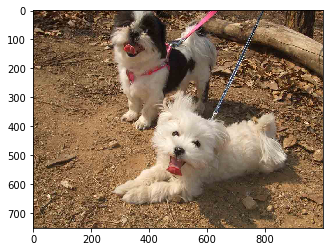

In [142]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('99.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

### GRAYSCALE

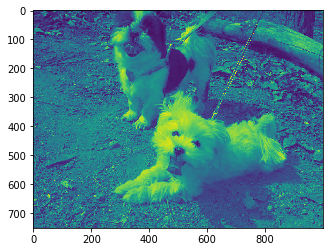

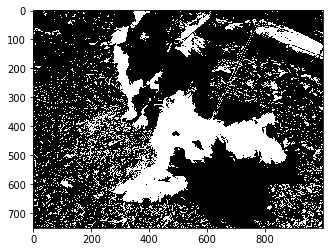

In [143]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
# THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0
images.append(thres1)
for i in images:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()
    #RGB인상태?

In [146]:
import cv2 
import numpy as np 
img = image 
img_sobel_x = cv2.Sobel(img, cv2.IMREAD_GRAYSCALE, 1, 0, ksize=3) 
img_sobel_x = cv2.convertScaleAbs(img_sobel_x) 
img_sobel_y = cv2.Sobel(img, cv2.IMREAD_GRAYSCALE, 0, 1, ksize=3) 
img_sobel_y = cv2.convertScaleAbs(img_sobel_y) 
img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0) 
cv2.imshow("sobel_x", img_sobel_x) 
cv2.imshow("sobel_y", img_sobel_y) 
cv2.imshow("sobel", img_sobel) 
cv2.waitKey(0) 
cv2.destroyAllWindows()



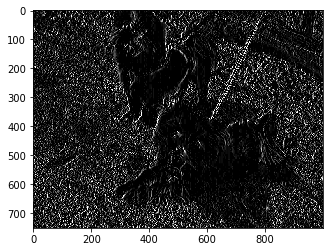

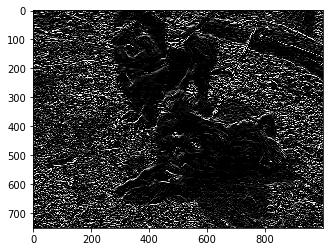

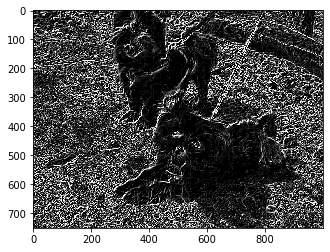

In [147]:
plt.imshow(cv2.cvtColor(img_sobel_x, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_sobel_y, cv2.COLOR_GRAY2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_sobel, cv2.COLOR_GRAY2RGB))
plt.show()



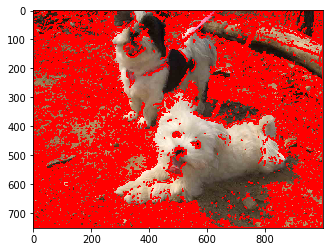

In [154]:
image = cv2.imread('99.jpg')
ret, thresh = cv2.threshold(img_sobel, 127, 255, cv2.THRESH_BINARY)
thresh = cv2.bitwise_not(thresh)

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]
image = cv2.drawContours(image, contours, -1, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [155]:
len(contours)

9686

## cv2.IMREAD에 대한 확실한 공부하기
### 색상변환 BGR, RGB, COLOR_GRAY, COLOR_BGR

In [164]:
import cv2
import sys


[[295 115 201 201]]


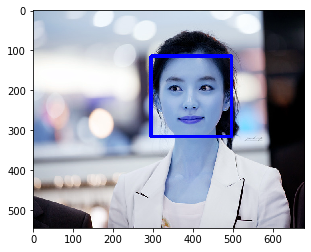

In [165]:
# 입력 파일 지정하기
image_file = "hhj.jpg"
# 캐스케이드 파일의 경로 지정하기 --- (※1)
cascade_file = "haarcascade_frontalface_alt.xml"
# 이미지 읽어 들이기 --- (※2)
image = cv2.imread(image_file)
# 그레이스케일로 변환하기
image_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# 얼굴 인식 특징 파일 읽어 들이기 --- (※3)
cascade = cv2.CascadeClassifier(cascade_file)
# 얼굴 인식 실행하기
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1,
    minSize=(150,150))
if len(face_list) > 0:
    # 인식한 부분 표시하기 --- (※4)
    print(face_list)
    color = (0, 0, 255)
    for face in face_list:
        x,y,w,h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=8)
    # 파일로 출력하기 --- (※5)
    cv2.imwrite("hhjFace.jpg", image)
else:
    print("no face")
    
plt.imshow(image)
plt.show()